<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Mountain_Scott_Linear_Algebra_Sprint_Challenge_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline 


#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

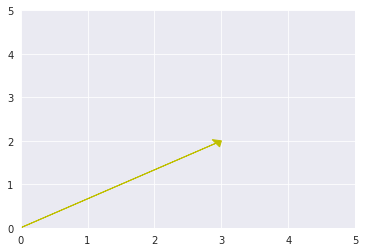

In [456]:
plt.arrow(0, 0, 3, 2, head_width=.2, head_length=0.1, color = 'y', length_includes_head=True )
plt.xlim(0,5)          
plt.ylim(0,5)

plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [399]:
np.linalg.norm([17, -4, -2, 1])

17.60681686165901

The norm or magnitude of vector represents its length 

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [400]:
np.dot([3,7,-2,12],[9,-7,4,6] )

42

the vectors are not orthogonal because their dot product is not zero

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.array([7,4,2,1,3,-1,2,6,-4]).reshape(3,3)

In [402]:
np.linalg.inv(E)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [403]:
E.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [0]:
F = np.array([2,-2,5,4,1,10,12,6,30]).reshape(3,3)


In [405]:
np.linalg.det(F)

0.0

The determinant of a matrix is zero when at least one of its row or column vectors are linearly dependent.  A determinant is also zero if the matrix is not invertible. 

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, sample variance, and sample standard deviation for both the number of customers and inches of new snow for the week. Remember that on SCs you can use library functions, dataframes, .describe(), etc. 



In [0]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

In [0]:
customers = np.array(customers)
snow = np.array(snow)



In [408]:
np.mean(customers)

1135.7142857142858

In [409]:
np.mean(snow)

2.7142857142857144

In [410]:
np.var(customers)

84653.06122448981

In [411]:
np.var(snow)

7.346938775510203

In [412]:
np.std(customers)

290.95199127087926

In [413]:
np.std(snow)

2.7105237087157534

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Variance is part of the calulation for the pearson r coefficient, which evaluates correlation.  This sample size is small, so any correlation may be spurious. From a bayesian pespective, I would enter the task with a bias that assumes weather has an effect on customer traffic. From a mathematical perspective, I'd say that it cannot be determined if the variances are comparable based on the size of the sample but I can say that variance is part of the determination of correlation (assuming the pearson r coefficient is used).  

ANOVA is common method for comparing variances among groups but considering there are only two variables a t test could also be used (assuming the two features are independent and normally distributed). 


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [414]:
np.cov(customers, snow) #quick check with numpy

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

In [415]:
pd.DataFrame({"Customers":customers, "Snow": snow})  #dataframe for labels

,Customers,Snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0
5,1450,6
6,1600,4


In [0]:
snow_cust = pd.DataFrame({"Customers":customers, "Snow": snow})  #dataframe for labels

In [417]:
snow_cust.cov()

,Customers,Snow
Customers,98761.904762,670.238095
Snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [418]:
# Let me get you some data to start you off.


data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
scaler = StandardScaler()

In [0]:
df_nums = df.select_dtypes(include="number")

In [421]:
df.shape

(4, 18)

In [422]:
df_nums.shape

(4, 17)

In [0]:
scaled_data = scaler.fit_transform(df_nums)

In [424]:
scaled_data

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

In [425]:
np.std(scaled_data)   #confirmation

1.0

In [426]:
np.mean(scaled_data).round(10)  #confirmation

0.0

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. 

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
pca = PCA()

In [0]:
components = pca.fit_transform(scaled_data)

In [429]:
np.cumsum(pca.explained_variance_ratio_)  #first two components explain 93% of variance "scaled_data"

array([0.68327871, 0.9319916 , 1.        , 1.        ])

In [0]:
pca_col_names = "PC1 PC2 PC3 PC4".split()



In [431]:
pca_col_names

['PC1', 'PC2', 'PC3', 'PC4']

In [432]:


pd.DataFrame(data=components, columns=pca_col_names)

,PC1,PC2,PC3,PC4
0,-0.954490,0.328318,1.829829,2.031442e-16
1,-4.520951,-1.735380,-0.781412,2.031442e-16
2,0.487978,3.233672,-0.765148,2.031442e-16
3,4.987462,-1.826611,-0.283270,2.031442e-16


In [0]:
pca_df  = pd.DataFrame(data=components, columns=pca_col_names)

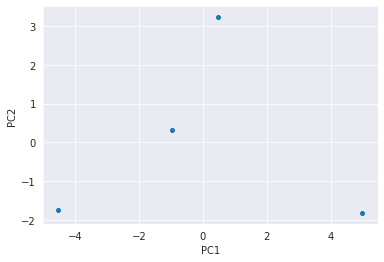

In [435]:
import seaborn as sns
sns.set_style("darkgrid")

sns.scatterplot(data=pca_df, x="PC1", y="PC2")

###Graphing the explained variance

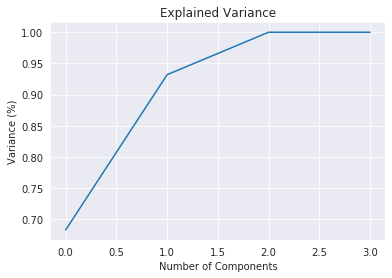

In [457]:

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.


Eigenvalues are scalars that show how much an eigenvector has been stretched or squished.

Eigenvectors are vectors that point in one direction (I guess like a ray). 

These two terms are useful because describing how much an eigenvector changes (using an eigenvalue) when it is projected upon a line is away to quanitify how well a linear approximation (a line of "best fit") describes the relationship between features and a target variable. 

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [436]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


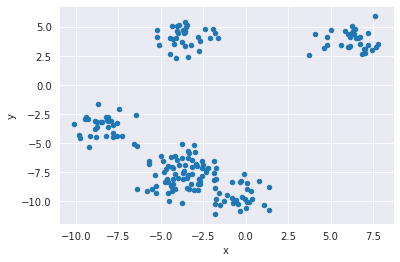

In [437]:
points.plot(x='x', y='y', kind="scatter")   #EDA

#looks like there are between 3 and 5 clusters

In [0]:
kmeans3 = KMeans(n_clusters=3)
kmeans4 = KMeans(n_clusters=4)
kmeans5 = KMeans(n_clusters=5)


In [439]:
kmeans3.fit(points)
kmeans4.fit(points)
kmeans5.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
points['clusters3'] = pd.Series(kmeans3.labels_)
points['clusters4'] = pd.Series(kmeans4.labels_)
points['clusters5'] = pd.Series(kmeans5.labels_)


In [0]:
centroids3 = pd.DataFrame(kmeans3.cluster_centers_, columns=["x","y"])
centroids4 = pd.DataFrame(kmeans4.cluster_centers_, columns=["x","y"])
centroids5 = pd.DataFrame(kmeans5.cluster_centers_, columns=["x","y"])


<Figure size 504x504 with 0 Axes>

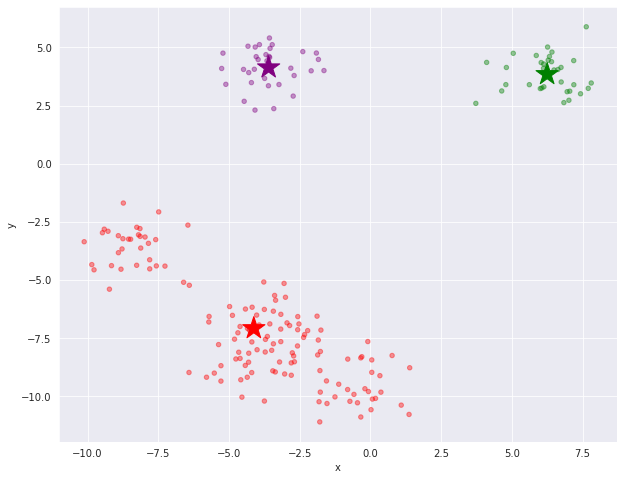

In [442]:
plt.figure(figsize=(7,7))
## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "purple"] # "orange", "indigo", "violet", "blue", "yellow"
points['color'] = points.clusters3.map(lambda p: colors[p])
ax = points.plot(    
    kind="scatter", 
    x='x', y='y',
    figsize=(10,8),
    c = points['color'],
    alpha = 0.4
)
centroids3.plot(
    kind="scatter", 
    x='x', y='y', 
    marker="*", c=colors, s=550,
    ax=ax
)

<Figure size 504x504 with 0 Axes>

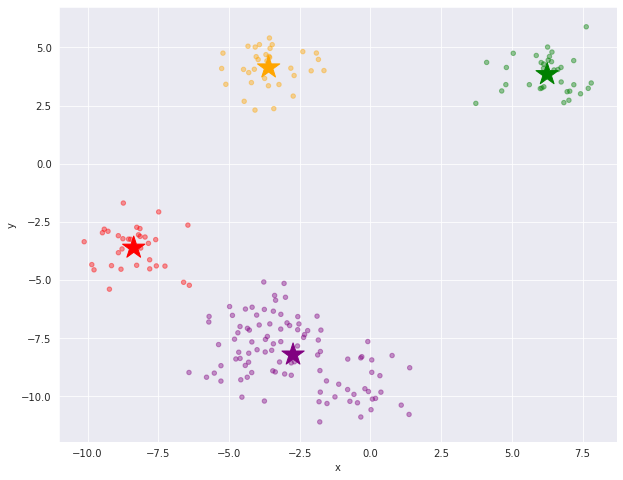

In [443]:
plt.figure(figsize=(7,7))
## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "purple", "orange"] # "indigo", "violet", "blue", "yellow"
points['color'] = points.clusters4.map(lambda p: colors[p])
ax = points.plot(    
    kind="scatter", 
    x='x', y='y',
    figsize=(10,8),
    c = points['color'],
    alpha = 0.4
)
centroids4.plot(
    kind="scatter", 
    x='x', y='y', 
    marker="*", c=colors, s=550,
    ax=ax
)

<Figure size 504x504 with 0 Axes>

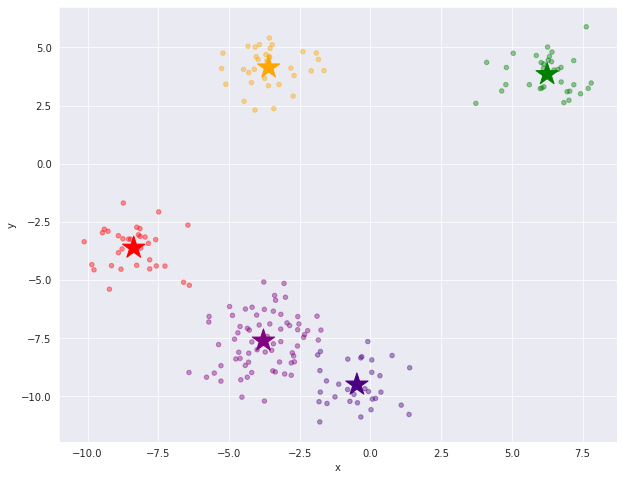

In [444]:
plt.figure(figsize=(7,7))
## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "purple", "orange", "indigo"] #, "violet", "blue", "yellow"
points['color'] = points.clusters5.map(lambda p: colors[p])
ax = points.plot(    
    kind="scatter", 
    x='x', y='y',
    figsize=(10,8),
    c = points['color'],
    alpha = 0.4
)
centroids5.plot(
    kind="scatter", 
    x='x', y='y', 
    marker="*", c=colors, s=550,
    ax=ax
)

###It could be argued that there are either four or five clusters.  The centroids are positioned where I would expect them to be for four or five clusters.  I'll choose five to be on the safe side unless I have access to additional info that would make that choice illogical. 

# Stretch Goals (AKA how to get a 3):

Complete the stretch goals for each section in order to get a 3 on that section.

## Parts 1 & 2 (do all of the following): 
  - Comment your code well with both markdown and inline comments where appropriate
  - Show your work with code and possibly LaTeX 
  - Justify your answers particularly well to show advanced mastery of this section

## Part 3 (do all of the following): 
 - Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)
    - If you want to include a the cumulative proportion of explained variance, you might be interested in this NumPy Function: [numpy.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
 - Give a top-notch explanation of eigenvalues and eigenvectors. Feel free to any materials, images, code, graphs, LaTeX, etc. to spruce up your answer.

## Part 4 (do all of the following):
- Justify your choice of k, both visually (scatterplot) and mathematically (elbow plot).